# Czym w ogólne jest NLP?
![Czym jest NLP](https://7wdata.be/wp-content/uploads/2021/09/DCF_NLP-in-the-Data-Center_ML-DL-Diagram.png)

NLP - Natural Language Processing to dział AI zajmujący się przetwarzaniem języka naturalnego. Czyli takie rzeczy jak:
* Generowanie artykułów
* Podsumowywanie tekstu
* POS (part of speach tagging)
* Przetwarzanie zbiorów danych
* Automatyczne Question anwsering
itp... Ogólnie wszystko powiązanego z językami, którymi się posługują ludzie.
Na codzień mamy doczynienia z tekstem więc nic dziwnego, że jest to tak istotna i prężnie rozwijająca się działka AI.
W związku z tym że korzystamy z komputerów pojawiają się problemy jak reprezentować ten tekst, jak go przetwarzać.

# Jak reprezentować tekst - podstawowe sposoby

## OneHotEncoding
Najprostszym sposobem jest już znany wam pewnie OneHotEncoding. Robimy to w następujący sposób:
1) tworzymy słownik ze słowami zawierającymi się w naszym zbiorze $V=(słowo_1,słowo_2,\dots,słowo_k)$
2) reprezentujemy dany tekst na podstawie wektora 0 i 1, gdzie 0 dajemy jeżeli wystąpiło dane słowo
czyli 
$$T = (a_1,a_2,\dots,a_{|V|}) \quad \text{gdzie } a_i =\begin{cases} 0 \text{ gdy }słowo_i\not\in Tekst\\  1 \text{ gdy }słowo_i\in Tekst\end{cases}$$
Gdzie V to nasz słownik, a T to reprezentacja.


In [2]:
def create_vocab(text):
    words = text.split()
    vocab = list(set(words))
    return vocab


def encode_text(text, vocab):
    text_words = set(text.split())
    return [word in text_words for word in vocab]


In [3]:
text = "Ala ma psa"
text2 = "Maciek nie ma psa"

vocab = create_vocab(text)
encode_text(text2, vocab), vocab


([True, True, False], ['psa', 'ma', 'Ala'])

### Bag of Words
Wadą naszego porzedniego rozwiązania jest to, że tylko sprawdza czy słowo wystąpiło, dlatego teraz dodatkowo będziemy zliczali liczbę wystąpień słów.
1) tworzymy słownik ze słowami zawierającymi się w naszym zbiorze $V=(słowo_1,słowo_2,\dots,słowo_k)$
2) reprezentujemy dany tekst na podstawie wektora wystąpień słów ze słownika w tekście
czyli 
$$T = (a_1,a_2,\dots,a_{|V|}) \quad \text{gdzie } a_i-\text{liczba wystąpień }słowa_i\text{ w tekście}$$
Gdzie V to nasz słownik, a T to reprezentacja.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups


In [5]:
twenty_train = fetch_20newsgroups(
    subset="train", shuffle=True, random_state=42
)


In [6]:
twenty_train.data[0]


"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [7]:
vectorizer = CountVectorizer().fit(twenty_train.data)


In [8]:
vectorizer.vocabulary_


{'from': 56979,
 'lerxst': 75358,
 'wam': 123162,
 'umd': 118280,
 'edu': 50527,
 'where': 124031,
 'my': 85354,
 'thing': 114688,
 'subject': 111322,
 'what': 123984,
 'car': 37780,
 'is': 68532,
 'this': 114731,
 'nntp': 87620,
 'posting': 95162,
 'host': 64095,
 'rac3': 98949,
 'organization': 90379,
 'university': 118983,
 'of': 89362,
 'maryland': 79666,
 'college': 40998,
 'park': 92081,
 'lines': 76032,
 '15': 4605,
 'was': 123292,
 'wondering': 124931,
 'if': 65798,
 'anyone': 28615,
 'out': 90774,
 'there': 114579,
 'could': 42876,
 'enlighten': 51793,
 'me': 80638,
 'on': 89860,
 'saw': 104813,
 'the': 114455,
 'other': 90686,
 'day': 45295,
 'it': 68766,
 'door': 48618,
 'sports': 109581,
 'looked': 76718,
 'to': 115475,
 'be': 32311,
 'late': 74693,
 '60s': 16574,
 'early': 50111,
 '70s': 18299,
 'called': 37433,
 'bricklin': 34995,
 'doors': 48620,
 'were': 123796,
 'really': 99822,
 'small': 108252,
 'in': 66608,
 'addition': 26073,
 'front': 56989,
 'bumper': 35612,
 'se

In [9]:
transformed = vectorizer.transform(twenty_train.data[:1])
transformed


<1x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [10]:
vectorizer = CountVectorizer().fit(["Ala ma psa"])


In [11]:
transformed = vectorizer.transform(
    ["Maciek ma psa i ma wiele kotów, które nie lubią psów"]
)


In [12]:
transformed.toarray()
# Zauważcie pierwszy problem, psów i psy mają tak naprawdę to samo znaczenie ale przez to
# że są w innej odmianie nie są zliczane.


array([[0, 2, 1]])

### TF-IDF (Term Frequency Inverse Document Frequency)
Zauważmy, że wadą zliczania jest to, że mogą występować w naszym zbiorze teksty, w których często powtarza się
to samo słowo i wtedy to że np. słowo "paragraf" wystąpiło 2137 za dużo nie znaczy. Z pomocą nadchodzi TF-IDF, który waży liczności
w zależności od tego w ilu dokumentach dane słowo wystąpiło, czyli większe wagi chcemy przywiązywać słowom "rozróżniającym". Niech t oznacza token, d oznacza dokument oraz D-zbiór dokumentów wtedy
\begin{align*}
    &tf(t,d)=\frac{f_{t,d}}{\sum_{t'\in d} f_{t',d}}\\
    &idf(t,D)=\log\frac{N}{|\{d\in D;\,t\in d\}}\\
    &tfidf(t,d,D)=tf(t,d)\times idf(t,D)
\end{align*}

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
vectorizer = TfidfVectorizer().fit(twenty_train.data)
transformed_data = vectorizer.transform(twenty_train.data)


In [15]:
transformed_data


<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

#### Challenge!
Korzystając z przedstawionych wcześniej reprezentacji tekstu przeucz drzewo losowe przewidujące klasę newsa

In [16]:
twenty_test = fetch_20newsgroups(subset="test", shuffle=True, random_state=42)
train_text, train_class = twenty_train.data, twenty_train.target
test_text, test_class = twenty_test.data, twenty_test.target


In [17]:
# Rozwiązanie


### n-gramy

Zauważmy, że czasem istotną informacją mogą być ciągi słów. Na tym właśnie polegają n-gramy. N-gram jest to ciąg n-słów.

Przykład 2-grama: \["Ala", "ma"\], \["ma", "Psa"\]

In [18]:
from nltk.util import ngrams


In [19]:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud "


In [20]:
# funckja ngrams wymaga podania na wejście sekwencji
list(ngrams(text.split(), 3))


[('Lorem', 'ipsum', 'dolor'),
 ('ipsum', 'dolor', 'sit'),
 ('dolor', 'sit', 'amet,'),
 ('sit', 'amet,', 'consectetur'),
 ('amet,', 'consectetur', 'adipiscing'),
 ('consectetur', 'adipiscing', 'elit,'),
 ('adipiscing', 'elit,', 'sed'),
 ('elit,', 'sed', 'do'),
 ('sed', 'do', 'eiusmod'),
 ('do', 'eiusmod', 'tempor'),
 ('eiusmod', 'tempor', 'incididunt'),
 ('tempor', 'incididunt', 'ut'),
 ('incididunt', 'ut', 'labore'),
 ('ut', 'labore', 'et'),
 ('labore', 'et', 'dolore'),
 ('et', 'dolore', 'magna'),
 ('dolore', 'magna', 'aliqua.'),
 ('magna', 'aliqua.', 'Ut'),
 ('aliqua.', 'Ut', 'enim'),
 ('Ut', 'enim', 'ad'),
 ('enim', 'ad', 'minim'),
 ('ad', 'minim', 'veniam,'),
 ('minim', 'veniam,', 'quis'),
 ('veniam,', 'quis', 'nostrud')]

Wszystkie wcześniej wymienione sposoby reprezentacji tekstu domyślnie operują na słowach ale mogą operować też na n-gramach

In [21]:
vectorizer = CountVectorizer(ngram_range=(1, 2)).fit(["Ala ma psa"])
transformed = vectorizer.transform(
    ["Maciek ma psa i ma wiele kotów, które nie lubią psów"]
)


In [22]:
vectorizer.get_feature_names()


/home/mchraba/anaconda3/envs/bootcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ala', 'ala ma', 'ma', 'ma psa', 'psa']

In [23]:
transformed.toarray()


array([[0, 0, 2, 1, 1]])

Analogicznie dla TFIDF

Wracamy do poprzedniego zadania, spróbujcie poprawić wynik wykorzystując n-gramy, tylko nie przesadzajcie z n bo wam nie starczy RAMu

In [24]:
twenty_test = fetch_20newsgroups(subset="test", shuffle=True, random_state=42)
train_text, train_class = twenty_train.data, twenty_train.target
test_text, test_class = twenty_test.data, twenty_test.target


In [25]:
# Rozwiązanie


## Zmniejszanie słownika
### Stop words
W każdym języku znajdują się słowa, które same nie niosą żadnej informacji, czasami warto pozbyć się takich słów, aby zmniejszyć wymiar słownika itp.

Przykłady dla angielskiego: "The" "who"

In [26]:
from nltk.corpus import stopwords


In [27]:
stops = set(stopwords.words("english"))


In [28]:
stops


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Stemming i Lematyzacja

Jak wcześniej zwróciłem uwagę czasami nie interesuje nas odmiana słowa tylko czy samo słowo wystąpiło. Np. chcemy w tekście szukać czy wystąpiła jakakolwiek odmiana słowa "pies" wtedy dokonujemy stemmingu(usunięcia ostatnich znaków ze słowa aby sprowadzić je do podstawowej formy) lub lematyzaji wykorzystującej kontekst

In [29]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk


In [30]:
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package wordnet to /home/mchraba/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mchraba/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


In [32]:
words = [
    "caresses",
    "flies",
    "dies",
    "mules",
    "denied",
    "died",
    "agreed",
    "owned",
    "humbled",
    "sized",
    "meeting",
    "stating",
    "siezing",
    "itemization",
    "sensational",
    "traditional",
    "reference",
    "colonizer",
    "plotted",
]
for word in words:
    lemmatized, stemmed = lemmatizer.lemmatize(word), stemmer.stem(word)
    print(f"{word}\nLemma:{lemmatized} Stemmed:{stemmed}")


caresses
Lemma:caress Stemmed:caress
flies
Lemma:fly Stemmed:fli
dies
Lemma:dy Stemmed:die
mules
Lemma:mule Stemmed:mule
denied
Lemma:denied Stemmed:deni
died
Lemma:died Stemmed:die
agreed
Lemma:agreed Stemmed:agre
owned
Lemma:owned Stemmed:own
humbled
Lemma:humbled Stemmed:humbl
sized
Lemma:sized Stemmed:size
meeting
Lemma:meeting Stemmed:meet
stating
Lemma:stating Stemmed:state
siezing
Lemma:siezing Stemmed:siez
itemization
Lemma:itemization Stemmed:item
sensational
Lemma:sensational Stemmed:sensat
traditional
Lemma:traditional Stemmed:tradit
reference
Lemma:reference Stemmed:refer
colonizer
Lemma:colonizer Stemmed:colon
plotted
Lemma:plotted Stemmed:plot


## Regex

regex czyli regular expressions to narzędzie pozwalające tworzyć wzorce tekstowe, które potem można wykorzystać np. do usuwania konkretnych wzorców z tekstu w celu filtorwania, wyciąganie emaili z tekstu itd.

In [33]:
import re


In [34]:
# Tak się tworzy regexa
pattern = re.compile(r"@gmail.com")


In [35]:
pattern.findall("kasjhfgasil jfalfhjas lfhaklfj pw@gmail.com")


['@gmail.com']

Jak tworzyć regexy
korzystając z cheat-sheetów

![regex_cheat_sheet](https://media.cheatography.com/storage/thumb/davechild_regular-expressions.750.jpg)

Biblioteka re pozwala na wiele rzeczy [dokumentacja](https://docs.python.org/3/library/re.html)

funkcje:
* __findall__: znajduje wszystkie wystąpienia wzorca
* __search__: zwraca None albo pierwsze wystąpienie wzorca
* __split__
* __sub__

Zadanie: stworzyć regex który wyciąga emaile z tekstu

In [ ]:
pattern = re.compile(r"")
to_search = "asoihfjaos hoasuf oajioah ofijoe pw@edu.pl klajshflakshfjklaj lfhasnoirhj weaoijpoa m abkcp@onet.pl"
pattern.findall(to_search)


##### grupy

In [37]:
regex_with_group = r"(\w+)@[\w\.]+"
re.findall(regex_with_group, to_search)


['pw', 'abkcp']

In [38]:
regex_with_group = r"(\w+)@([\w\.]+)"
re.findall(regex_with_group, to_search)


[('pw', 'edu.pl'), ('abkcp', 'onet.pl')]

In [39]:
re.sub(regex_with_group, "\\1@uganda.ug", to_search)


'asoihfjaos hoasuf oajioah ofijoe pw@uganda.ug klajshflakshfjklaj lfhasnoirhj weaoijpoa m abkcp@uganda.ug'

In [40]:
re.sub(regex_with_group, "ale_jazda@\\2", to_search)


'asoihfjaos hoasuf oajioah ofijoe ale_jazda@edu.pl klajshflakshfjklaj lfhasnoirhj weaoijpoa m ale_jazda@onet.pl'

In [41]:
regex_with_group = r"(\w+)@(?:[\w\.]+)"
re.findall(regex_with_group, to_search)


['pw', 'abkcp']

### Tokenizacja

Poważnym problemem jest w jaki sposób tworzyć tokeny z tekstu:
* znaki oddzielone spacjami?
* znaki oddzielone na znakach interpunkcyjnych?
* rozdzielanie na podstawie regexów?
* inne metody?

#### Oddzielanie spacjami
jest to najprostszy sposób, ale też nie najlepszy, ponieważ np. słowo "won't" będzie jednym tokenem a samo "n't" można też dodać jako oddzielny token

#### oddzielanie na znakach interpunkcyjnych i spacjach
Tutaj dodatkowo rozdzielamy spacją wszystkie znaki interpunkcyjne czyli np. "Ala ma psa." -> \["Ala", "ma", "psa", "."\]

#### oddzielanie na regexach
jest to połączenie poprzednich metod i dodanie specjalnych fraz np. oddzielanie "n't" w języku angielskim.

In [42]:
from nltk.tokenize import word_tokenize, sent_tokenize


In [43]:
word_tokenize("I didn't want to come.")


['I', 'did', "n't", 'want', 'to', 'come', '.']

In [44]:
text = "Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt. Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam aliquam quaerat voluptatem. Ut enim ad minima veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur? Quis autem vel eum iure reprehenderit qui in ea voluptate velit esse quam nihil molestiae consequatur, vel illum qui dolorem eum fugiat quo voluptas nulla pariatur?"


In [45]:
sent_tokenize(text)


['Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo.',
 'Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt.',
 'Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam aliquam quaerat voluptatem.',
 'Ut enim ad minima veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur?',
 'Quis autem vel eum iure reprehenderit qui in ea voluptate velit esse quam nihil molestiae consequatur, vel illum qui dolorem eum fugiat quo voluptas nulla pariatur?']

#### Subwords tokenization
Wszystkie poprzednie metody mają problem z nowymi słowami, które mogą się pojawić podczas tokenizacji nowego tekstu. W przypadku poprzednich metod zastępuje się zazwyczaj słowa nie występujące w słowniku przez "<unk>". 

Kolejnym problemem jest wielkość słownika, im więcej słów chcemy posiadać tym większy musi być nasz słownik co prowadzi do coraz większych wymagań pamięciowych w celu operowania na tekstach. 

Problemy te są rozwiązywane przez tokenizatory, który dokonują podziału na tokeny, które nie są całymi słowami tylko ich fragmentami. W takich modelach z góry określa się wielkość słownika. Oczywiście powstaje pytanie jak wybierać ciągu znaków, które będą tokenami.

Warto na nie zwrócić uwagę bo wszystkie aktualnie najlepsze modele językowe oparte o sieci neuronowe z nich korzystają ;)

In [46]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer.tokenize("I have a new GPU!")


['i', 'have', 'a', 'new', 'gp', '##u', '!']

In [47]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()
trainer = BpeTrainer(
    special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"],
    vocab_size=2022,
    min_frequency=1,
)

with open("tokenizer_train.txt", "w") as f:
    for line in twenty_train.data[:100]:
        f.write(line + "\n")


In [48]:
tokenizer.train(["tokenizer_train.txt"], trainer)


In [49]:
tokenizer.encode("Time to tokenize!!!.").tokens


['Tim', 'e', 'to', 'to', 'k', 'en', 'ize', '!!', '!', '.']

Można też dodawać normalizacje

In [51]:
from tokenizers import normalizers
from tokenizers.normalizers import NFD, StripAccents

normalizer = normalizers.Sequence([NFD(), StripAccents()])
normalizer.normalize_str("Héllò hôw are ü?")


'Hello how are u?'

In [52]:
tokenizer.normalizer = normalizer


Albo określać jak mają wyglądać dane wyjściowe

In [53]:
from tokenizers.processors import TemplateProcessing

tokenizer.post_processor = TemplateProcessing(
    single="[CLS] $A [SEP]",
    pair="[CLS] $A [SEP] $B:1 [SEP]:1",
    special_tokens=[("[CLS]", 1), ("[SEP]", 2)],
)


In [54]:
tokenizer.encode("Time to tokenize!!!.").tokens


['[CLS]', 'Tim', 'e', 'to', 'to', 'k', 'en', 'ize', '!!', '!', '.', '[SEP]']

Z biblioteką [tokenizers](https://huggingface.co/docs/tokenizers/python/latest/) dodać wiele różnych rzeczy jak dodawanie specjalnych tokenów na początek koniec, wiele innych pretokenizatorów i wiele innych gotowych tokenizatorów.

### Spacy i problemy lingwistyczne
spacy jest biblioteką zawierającą wiele modeli do problemów lingwistycznych, które teraz sobie krótko omówimy.

##### tokenizacja
spacy także posiada tokenizacje

In [49]:
import spacy


In [ ]:
#!python -m spacy download en_core_web_sm


In [51]:
# wczytywanie modelu językowego
nlp = spacy.load("en_core_web_sm")
doc = nlp("Akash has been buyed by byju's in 73,000 Core's")
for token in doc:
    print(token.text)


Akash
has
been
buyed
by
byju
's
in
73,000
Core
's


#### Part-Of_Speech (POS) - tagging
problem ten polega na wyjaśnieniu w jaki sposób dane słowo jest wykorzystane w zdaniu. Ustalone jest 8 części mowy (po ang bo będzie łatwiej):
* Noun
* Pronoun
* Adjective
* Verb
* Adverb
* Preposition
* Conjunction
* Interjection

In [52]:
doc = nlp("I am Ritesh,currently a Computer Science and NLP Researcher")

# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token, token.tag_, token.pos_, spacy.explain(token.tag_))


I PRP PRON pronoun, personal
am VBP AUX verb, non-3rd person singular present
Ritesh NNP PROPN noun, proper singular
, , PUNCT punctuation mark, comma
currently RB ADV adverb
a DT DET determiner
Computer NNP PROPN noun, proper singular
Science NNP PROPN noun, proper singular
and CC CCONJ conjunction, coordinating
NLP NNP PROPN noun, proper singular
Researcher NNP PROPN noun, proper singular


In [53]:
doc = nlp("I am Ritesh,currently a Computer Science and NLP Researcher")
spacy.displacy.render(doc, style="dep", jupyter=True)


#### Dependency Parsing
Jest to proces tworzenia struktury gramatycznej zdania. Daje on nam zależność słów w zdaniu.

In [54]:
doc = nlp("I am Ritesh,currently a Computer Science and NLP Researcher")

for token in doc:
    print(token.text, "-->", token.dep_)


I --> nsubj
am --> ROOT
Ritesh --> attr
, --> punct
currently --> advmod
a --> det
Computer --> nmod
Science --> nmod
and --> cc
NLP --> compound
Researcher --> appos


#### Named Entity Recogniton
Czyli po prostu wykrywanie nazw własnych

In [55]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Reliance is looking at buying U.K. based analytics startup for $7 billion"
)
# See the entity present
print(f"Enitites: {doc.ents}")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


Enitites: (Reliance, U.K., $7 billion)
Reliance 0 8 ORG
U.K. 30 34 GPE
$7 billion 63 73 MONEY


#### Entity Recogniton
nazywane też Entity Detection jest bardziej zaawansowany od NER, ponieważ rozpoznaje istotne elementy między innymi miejsca, ludzi, organizacje, języki itp.

In [56]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(
    u"""The Amazon rainforest,[a] alternatively, the Amazon Jungle, also known in English as Amazonia, is a moist broadleaf tropical rainforest in the Amazon biome that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 km2 (2,700,000 sq mi), of which 5,500,000 km2 (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations.

The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Bolivia, Ecuador, French Guiana, Guyana, Suriname, and Venezuela. Four nations have "Amazonas" as the name of one of their first-level administrative regions and France uses the name "Guiana Amazonian Park" for its rainforest protected area. The Amazon represents over half of the planet's remaining rainforests,[2] and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species.[3]

Etymology
The name Amazon is said to arise from a war Francisco de Orellana fought with the Tapuyas and other tribes. The women of the tribe fought alongside the men, as was their custom.[4] Orellana derived the name Amazonas from the Amazons of Greek mythology, described by Herodotus and Diodorus.[4]

History
See also: History of South America § Amazon, and Amazon River § History
Tribal societies are well capable of escalation to all-out wars between tribes. Thus, in the Amazonas, there was perpetual animosity between the neighboring tribes of the Jivaro. Several tribes of the Jivaroan group, including the Shuar, practised headhunting for trophies and headshrinking.[5] The accounts of missionaries to the area in the borderlands between Brazil and Venezuela have recounted constant infighting in the Yanomami tribes. More than a third of the Yanomamo males, on average, died from warfare.[6]"""
)

entities = [(i, i.label_, i.label) for i in doc.ents]
entities


[(Amazon, 'ORG', 383),
 (English, 'LANGUAGE', 389),
 (Amazonia, 'GPE', 384),
 (Amazon, 'ORG', 383),
 (South America, 'LOC', 385),
 (7,000,000 km2, 'QUANTITY', 395),
 (2,700,000, 'CARDINAL', 397),
 (5,500,000 km2, 'CARDINAL', 397),
 (2,100,000, 'CARDINAL', 397),
 (nine, 'CARDINAL', 397),
 (Brazil, 'GPE', 384),
 (60%, 'PERCENT', 393),
 (Peru, 'GPE', 384),
 (13%, 'PERCENT', 393),
 (Colombia, 'GPE', 384),
 (10%, 'PERCENT', 393),
 (Bolivia, 'GPE', 384),
 (Ecuador, 'GPE', 384),
 (French, 'NORP', 381),
 (Guiana, 'PERSON', 380),
 (Guyana, 'GPE', 384),
 (Venezuela, 'GPE', 384),
 (Four, 'CARDINAL', 397),
 (Amazonas, 'WORK_OF_ART', 388),
 (one, 'CARDINAL', 397),
 (first, 'ORDINAL', 396),
 (France, 'GPE', 384),
 (Guiana Amazonian Park, 'WORK_OF_ART', 388),
 (Amazon, 'ORG', 383),
 (over half, 'CARDINAL', 397),
 (an estimated 390 billion, 'MONEY', 394),
 (16,000, 'CARDINAL', 397),
 (Amazon, 'ORG', 383),
 (Tapuyas, 'LOC', 385),
 (custom.[4, 'NORP', 381),
 (Amazonas, 'PERSON', 380),
 (Amazons, 'NORP',

In [57]:
spacy.displacy.render(doc, style="ent", jupyter=True)


## Reprezentacja słów i sieci neuronowe czyli embeddingi
Embeddingi polegają na zmniejszeniu wymiaru danych tekstowych, aby zakodować ciąg słów o słowniku wielkości 50000 tworzymy macierz o wymiarach seq_len x 50000, co można się domyślić nie jest optymalne, embeddingi sprowadzają dane tekstowe do dużo niższego wymiaru np. 300.

Przykładami embeddingów są:
* Word2Vec
* GloVe
* FastText

### Word2Vec
![Word2vec image](https://imgs.developpaper.com/imgs/1091794672-5c7cc60fab3ba_articlex.png)

### Podobieństwo słów
Mając embeddingi słów można badać ich podobieństwo badając ich odległość w przestrzeni, w której się znajdują. Najczęściej wykorzystuje się do tego odległość cosinusową
\begin{align*}
    cos\_sim(A,B) = \frac{A\cdot B}{||A||||B||}=cos(\theta)
\end{align*}
która pokazuje jaki jest kąt między dwoma wektorami, jeżeli 0 wtedy mamy 1 i oznacza to że wektory są tak samo skierowane czyli są podobne.

In [58]:
from gensim.models import Word2Vec

sentences = [
    ["this", "is", "the", "first", "sentence", "for", "word2vec"],
    ["this", "is", "the", "second", "sentence"],
    ["yet", "another", "sentence"],
    ["one", "more", "sentence"],
    ["and", "the", "final", "sentence"],
]
# size: (default 100) wymiar przestrzeni embeddingów.
# window: (default 5) okno które będzie wykorzystywane do predykcji lub będzie predykowane.
# min_count: (default 5) minimalna liczba wystąpień słowa aby było uwzględnione w słowniku.
# workers: (default 3) liczba wątków wykorzystana do uczenia.
# sg: (default 0 or CBOW) jaki algorytm ma być wykorzystany do uczenia 0-CBOW, 1-Skip-gram.
model = Word2Vec(sentences, min_count=1)

words = list(model.wv.key_to_index.keys())
print(words)
print(model.wv["sentence"])


['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.786960

In [59]:
X = model.wv[words]


In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [61]:
x_transformed = PCA(2).fit_transform(X)


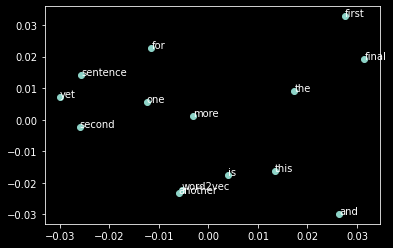

In [62]:
plt.scatter(x_transformed[:, 0], x_transformed[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(x_transformed[i, 0], x_transformed[i, 1]))


##### wczytywanie gotowych embeddingów
Teraz wczytam gotowe embeddingi, które można pobrać [tutaj](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g)

In [63]:
from gensim.models import KeyedVectors

filename = "GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(filename, binary=True)


In [64]:
result = model.most_similar(
    positive=["woman", "king"], negative=["man"], topn=1
)
print(result)


[('queen', 0.7118193507194519)]


### embeddingi fasttext
W Word2Vec tworzymy embeddingi słów w celu stworzenia embeddingu więc nie jesteśmy w stanie otrzymać embeddingu słowa spoza naszego słownika. Fasttext inaczej pochodzi do tworzenia embeddingów, ponieważ słowa, które są do siebie podobne(co do ogległości edycyjnej) powinny mieć podobne embeddingi postanowiono tworzyć je na podstawie n-gramów na znakach (dla n od 3 do 6). Jak to działa?
1) Dodajemy na początek słowa '<' a na koniec '>'.

![](https://amitness.com/images/fasttext-angular-brackets.png)

2) tworzymy n-gramy dla słowa.
3) Ponieważ liczba n-gramów może być ogromna dlatego, zamiast trenować embeddingi dla każdego unikatowego n-grama, trenowane jest B (B-bucket size). Każdy n-gram jest przetwarzany przy użyciu funkcji hashującej do liczby całkowitej między 1 a B.
4) Do słownika dodajemy także słowa, które występują w zbiorze treningowym. Zatem mamy B+|V| embeddingów.

#### Jak trenowany jest fasttext?

Embeddingi są trenowane wykorzystując skip-gram z negatywnym próbkowaniem. Czyli na podstawie słowa chcemy przewidzieć słowa sąsiadujące. Ale embedding słowa na podstawie, którego chcemy przewidywać to suma n-gramów i embeddingu tego słowa.

![](https://amitness.com/images/fasttext-negative-sampling-goal.png)



### Doc2Vec
Doc2Vec jest wykorzystaniem podobnego pomysłu co Word2Vec. Czyli na podstawie contekstu przewidujemy słowo. Ale skąd tutaj embedding dokumentu? Dodany jest dodatkowo embedding paragrafu jak na zdjęciu poniżej. Z dodatkiem tego embeddingu trenowany jest model  PV-DM(Distributed Memory version of Paragraph Vector) lub PV-DBOW(Words version of Paragraph Vector) (Podobny model do skip-gram).

![](https://miro.medium.com/max/486/0*x-gtU4UlO8FAsRvL.) ![](https://miro.medium.com/max/440/0*NtIsrbd4VQzUKVKr.)

Jak zdobyć embedding nowego dokumentu? W tym celu zamrażane są wszystkie wagi sieci i jedyną zmienną jest embedding dokumentu, następnie ta zmienna jest aktualizowana trenując ją jak PV-DM lub PV-DBOW.

Możliwe też jest z wykorzystaniem Doc2Vec modelowanie gatunków. Zamiast unikatowego id można dodawać(dodatkowo lub jako jedyne wejście) tag związany z kategorią. W ten sposób otrzymamy embeddingi kategorii i po wyznaczeniu embeddingu danego dokumentu możemy powiedzieć do której kategorii on najprawdopodobniej należy.

![](https://miro.medium.com/max/422/1*YfOv1_8tmTiahgbpEt5LCw.png)

In [57]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Tutaj możemy też podać kategorie
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)


[parametry klasy Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html#introduction)

In [63]:
common_texts


[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [60]:
x = model.infer_vector(["My", "First", "Doc2Vec"])


In [64]:
model.similarity_unseen_docs(["human", "response"], ["computer", "response"])


0.7186111

### Topic Modeling i LDA(Latent Dirichlet allocation)

LDA tworzy k tematów, do których przyporządkowuje nasze dokumenty wykorzystując rozkłady prawdopodobieństwa słów.
LDA zakłada, że mamy model probabilistyczny, w którym mamy zmienną ukrytą T dotyczącą tematu, natomiast widzimy słowa i dokumenty. 
LDA działa w następujący sposób:
* Przechodzi przez wszsytkie dokumenty i losowo przypisuje każde słowo do jednego z k tematów
* Dla każdego dokumentu d przejdź przez wszystkie słowa w i zaktualizuj prawdopodobieństwo $p(w|t,d)=p(w|t)\cdot p(t|d)$
* Przejdź przez wyszystkie słowa i zaktualizuj temat do którego te słowa należą.

In [67]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

# Train the model on the corpus.
lda = LdaModel(common_corpus, num_topics=10)


In [68]:
other_texts = [
    ["computer", "time", "graph"],
    ["survey", "response", "eps"],
    ["human", "system", "computer"],
]
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[0]
vector = lda[unseen_doc]


In [70]:
vector


[(0, 0.7749639),
 (1, 0.025000058),
 (2, 0.025000058),
 (3, 0.025000053),
 (4, 0.025014505),
 (5, 0.025010586),
 (6, 0.025000053),
 (7, 0.025010673),
 (8, 0.025000058),
 (9, 0.025000058)]

### Analiza Sentymentu
Analiza sentymentu polega na automatycznym wykrywaniu sentymentu na podstawie tekstu. Istnieje wiele "sentymentów" jakie można wygrywać, ale najpopularniejsze to:
* Analiza sentymentu w skali 1-5 (1 bardzo negatywny, 5 bardzo pozytywny).
* Analiza sentymentu pozytywnego lub negatywnego, np. wykrywanie negatywnych opinii produktu
* Detekcja emocji np. smutek, szczęście, złość itp.

[Oceny filmów](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)

In [8]:
import pandas as pd

train_data = pd.read_csv(
    "movie_reviews/train.tsv.zip", sep="\t", compression="zip"
)

test_data = pd.read_csv(
    "movie_reviews/test.tsv.zip", sep="\t", compression="zip"
)


In [9]:
train_data.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


#### Cel: stworzyć model, który najlepiej poradzi sobie z tym zadaniem
Propozycje:
* Doc2vec?
* Embeddingi wsadzone do klasycznych modeli ML

## Tematy
### Sub-word tokenizers:
* [Byte-Pair Encoding](https://arxiv.org/abs/1508.07909)
* [WordPiece](https://ai.googleblog.com/2021/12/a-fast-wordpiece-tokenization-system.html)
* [Unigram Language Model](https://arxiv.org/pdf/1804.10959.pdf)
* [SentencePiece](https://jacky2wong.medium.com/understanding-sentencepiece-under-standing-sentence-piece-ac8da59f6b08)
### Embeddingi
* [Word2Vec](https://arxiv.org/abs/1301.3781)
* [GloVe](https://nlp.stanford.edu/projects/glove/)
* [FastText](https://arxiv.org/pdf/1607.04606.pdf)
* [Doc2Vec](https://arxiv.org/pdf/1301.3781.pdf)
### LDA
[Dokładniejsze wyjaśnienie LDA](https://www.mygreatlearning.com/blog/understanding-latent-dirichlet-allocation/)
## Biblioteki:
* [NLTK](https://www.nltk.org/)
* [re](https://docs.python.org/3/library/re.html)
* [Spacy](https://spacy.io/)
* [FastText](https://fasttext.cc/)
* [Hugging face tokenizers](https://huggingface.co/docs/tokenizers/python/latest/)
* [Gensim](https://radimrehurek.com/gensim/)